In [1]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import os
import torchvision
import numpy as np
from torch.autograd import Variable
import torchmetrics
from tqdm import tqdm
%matplotlib inline

E:\software\anaconda3\envs\pytorch\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# 预处理函数
transform_func = transforms.Compose([transforms.ToTensor(),
                                    transforms.Normalize(mean=[0.5],std=[0.5])])

In [4]:
# 下载训练集并预处理
train_dataset = datasets.MNIST(root='./data/',
				train=True,
				transform=transform_func,
				download=True)
# 下载测试集并预处理
test_dataset = datasets.MNIST(root='./data/',
				train=False,
				transform=transform_func,
				download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



  3%|▎         | 294912/9912422 [00:14<08:02, 19937.62it/s]


Failed download. Trying https -> http instead. Downloading http://ossci-datasets.s3.amazonaws.com/mnist/train-images-idx3-ubyte.gz to ./data/MNIST\raw\train-images-idx3-ubyte.gz


100%|██████████| 9912422/9912422 [04:19<00:00, 38169.36it/s]


Extracting ./data/MNIST\raw\train-images-idx3-ubyte.gz to ./data/MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 233035.72it/s]


Extracting ./data/MNIST\raw\train-labels-idx1-ubyte.gz to ./data/MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1389210.51it/s]


Extracting ./data/MNIST\raw\t10k-images-idx3-ubyte.gz to ./data/MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 43014.33it/s]

Extracting ./data/MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data/MNIST\raw



In [5]:
batch_size = 64
# 装载训练集，打乱顺序
data_loader_train = torch.utils.data.DataLoader(dataset=train_dataset,
                                                batch_size = batch_size,
                                                shuffle = True,
                                                num_workers=2)

# 装载测试集，打乱顺序
data_loader_test = torch.utils.data.DataLoader(dataset=test_dataset,
                                               batch_size = batch_size,
                                               shuffle = True,
                                                num_workers=2)

In [6]:
# 打印MNIST预处理结果
print(train_dataset[1])

(tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -

[tensor(3), tensor(6), tensor(7), tensor(6), tensor(4), tensor(6), tensor(4), tensor(4), tensor(8), tensor(9), tensor(1), tensor(1), tensor(2), tensor(9), tensor(6), tensor(1), tensor(5), tensor(3), tensor(8), tensor(5), tensor(2), tensor(0), tensor(5), tensor(9), tensor(6), tensor(5), tensor(4), tensor(4), tensor(9), tensor(8), tensor(3), tensor(1), tensor(3), tensor(4), tensor(3), tensor(9), tensor(8), tensor(7), tensor(9), tensor(7), tensor(9), tensor(5), tensor(9), tensor(9), tensor(2), tensor(9), tensor(6), tensor(1), tensor(2), tensor(9), tensor(4), tensor(7), tensor(3), tensor(6), tensor(5), tensor(7), tensor(7), tensor(5), tensor(4), tensor(5), tensor(9), tensor(1), tensor(5), tensor(0)]


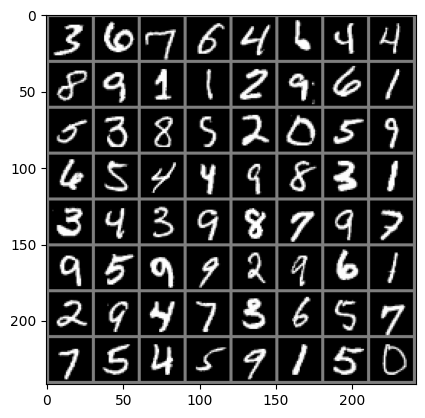

In [7]:
# 打印MNIST图片
images, labels = next(iter(data_loader_train))
img = torchvision.utils.make_grid(images)

img = img.numpy().transpose(1,2,0)
std = [0.5,0.5,0.5]
mean = [0.5,0.5,0.5]
img = img*std+mean
print([labels[i] for i in range(64)])
plt.imshow(img)

In [48]:
class CNN_wr(torch.nn.Module):
    learning_rate=0.1
    def __init__(self):
        # 调用nn初始化
        super(CNN_wr, self).__init__()
        # 超参数
        
        input_feature = 1
        
        
        feature_1 = 64
        feature_2 = 128
        
        # 搭建第一层
        self.conv1 = torch.nn.Sequential(torch.nn.Conv2d(input_feature,feature_1,kernel_size=5,stride=1,padding=0),
                                         torch.nn.ReLU(),
                                         torch.nn.MaxPool2d(kernel_size=2,stride=2))
        # 第二层
        self.conv2 = torch.nn.Sequential(torch.nn.Conv2d(feature_1,feature_2,kernel_size=3,stride=1,padding=0),
                                         torch.nn.ReLU(),
                                         torch.nn.MaxPool2d(kernel_size=2,stride=2))
        # 全连接层
        self.dense = torch.nn.Sequential(torch.nn.Linear(128*5*5,256),
                                         torch.nn.ReLU(),
                                        #  torch.nn.Dropout(p=0.5),
                                         torch.nn.Linear(256, 10))
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.shape[0], -1)
        x = self.dense(x)
        return x
    


In [49]:
CNN_model_wr = CNN_wr()

In [50]:
print(CNN_model_wr)

CNN_wr(
  (conv1): Sequential(
    (0): Conv2d(1, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (dense): Sequential(
    (0): Linear(in_features=3200, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=10, bias=True)
  )
)


In [51]:
device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [52]:
# 损失函数和优化
loss_CE = torch.nn.CrossEntropyLoss()
loss_CE = loss_CE.to(device)
optimizer = torch.optim.SGD(CNN_model_wr.parameters(), lr=CNN_model_wr.learning_rate)
epochs = 10
CNN_model_wr = CNN_model_wr.to(device)

In [71]:
import warnings
warnings.filterwarnings("ignore")

# 训练模型
for epoch in tqdm(range(epochs)):
    test_acc = torchmetrics.Accuracy(task='multiclass', average='none', num_classes=10)
    test_acc = test_acc.to(device)
    test_recall = torchmetrics.Recall(task='multiclass', average='none', num_classes=10)
    test_recall = test_recall.to(device)
    test_precision = torchmetrics.Precision(task='multiclass', average='none', num_classes=10)
    test_precision = test_precision.to(device)
    test_auc = torchmetrics.AUROC(task='multiclass', average="macro", num_classes=10)
    test_auc = test_auc.to(device)

    
    running_loss = 0.0
    running_correct = 0
    print("Epoch {}/{}".format(epoch+1, epochs))
    print("-"*10)
    
    # TRAIN
    for data in data_loader_train:
        # __forward__
        X_train, y_train = data
        X_train = X_train.to(device)
        y_train = y_train.to(device)
        # 封装tensor，用于反向传播
        X_train, y_train = Variable(X_train), Variable(y_train)
        outputs = CNN_model_wr(X_train)
        # 得到loss
        loss = loss_CE(outputs, y_train)
        # 每个batch的最大值，取其索引
        _, index = torch.max(outputs.data, 1)
        
        # __backward__
        # 清空过往梯度
        optimizer.zero_grad()
        # 计算梯度
        loss.backward()
        # 更新权重
        optimizer.step()
        
        running_loss += loss.data
        running_correct += torch.sum(index == y_train.data)
    
    # TEST
    testing_correct = 0
    for data in data_loader_test:
        X_test, y_test = data
        X_test = X_test.to(device)
        y_test = y_test.to(device)
        X_test, y_test = Variable(X_test), Variable(y_test)
        outputs = CNN_model_wr(X_test)
        _, index = torch.max(outputs.data, 1)
        
        testing_correct += torch.sum(index == y_test.data)
        
        test_acc(outputs.argmax(1), y_test)
        test_auc.update(outputs, y_test)
        test_recall(outputs.argmax(1), y_test)
        test_precision(outputs.argmax(1), y_test)
        
    # 计算一个epoch的accuray、recall、precision、AUC
    total_acc = test_acc.compute()
    total_recall = test_recall.compute()
    total_precision = test_precision.compute()
    total_auc = test_auc.compute()
    total_f1 = 2* (total_precision.mean(0)) / (total_precision.mean(0) + total_recall.mean(0))
    # 将每一个epoch的结果保存在txt文件中
    with open("./result/CNN_wr.txt", "a") as f:
        f.write("Epoch: {}, Train Loss: {:.4f}, Train Accuracy: {:.4f}%, Test Accuracy: {:.4f}%\n".format(epoch + 1,
                                                                                      running_loss/len(train_dataset),
                                                                                      100*running_correct/len(train_dataset),
                                                                                      100*testing_correct/len(test_dataset)))
        f.write(f"Torch Metrics Acc: {total_acc}\n")
        f.write("Recall(0~9): {:.4f}\n".format(total_recall.mean(0)))
        f.write("Precision(0~9): {:.4f}\n".format(total_precision.mean(0)))
        f.write("f1 score: {:.4f}\n".format(total_f1))
        f.write("Auc: {:.4f}\n\n".format(total_auc.item()))
    
    print("Loss: {:.4f}, Train Accuracy: {:.4f}%, Test Accuracy: {:.4f}%".format(running_loss/len(train_dataset),
                                                                                      100*running_correct/len(train_dataset),
                                                                                      100*testing_correct/len(test_dataset)))
    print(f"Torch Metrics Acc: {total_acc}")
    print("Recall(0~9): {:.4f}".format(total_recall.mean(0)))
    print("Precision(0~9): {:.4f}".format(total_precision.mean(0)))
    print("f1 score: {:.4f}".format(total_f1))
    print("Auc: {:.4f}\n".format(total_auc.item()))

    # 清空计算对象
    test_precision.reset()
    test_acc.reset()
    test_recall.reset()
    test_auc.reset()
    

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1/10
----------


 10%|█         | 1/10 [00:12<01:49, 12.12s/it]

Loss: 0.0000, Train Accuracy: 100.0000%, Test Accuracy: 99.4000%
Torch Metrics Acc: tensor([0.9969, 0.9991, 0.9961, 0.9941, 0.9949, 0.9933, 0.9875, 0.9932, 0.9918,
        0.9921], device='cuda:0')
Recall(0~9): 0.9939
Precision(0~9): 0.9939
f1 score: 1.0000
Auc: 1.0000

Epoch 2/10
----------


 20%|██        | 2/10 [00:24<01:37, 12.13s/it]

Loss: 0.0000, Train Accuracy: 100.0000%, Test Accuracy: 99.3800%
Torch Metrics Acc: tensor([0.9969, 0.9991, 0.9961, 0.9941, 0.9949, 0.9933, 0.9875, 0.9922, 0.9918,
        0.9911], device='cuda:0')
Recall(0~9): 0.9937
Precision(0~9): 0.9937
f1 score: 1.0000
Auc: 1.0000

Epoch 3/10
----------


 30%|███       | 3/10 [00:36<01:25, 12.20s/it]

Loss: 0.0000, Train Accuracy: 100.0000%, Test Accuracy: 99.3900%
Torch Metrics Acc: tensor([0.9969, 0.9991, 0.9952, 0.9941, 0.9949, 0.9922, 0.9875, 0.9942, 0.9918,
        0.9921], device='cuda:0')
Recall(0~9): 0.9938
Precision(0~9): 0.9938
f1 score: 1.0000
Auc: 1.0000

Epoch 4/10
----------


 40%|████      | 4/10 [00:48<01:13, 12.17s/it]

Loss: 0.0000, Train Accuracy: 100.0000%, Test Accuracy: 99.3900%
Torch Metrics Acc: tensor([0.9969, 0.9991, 0.9961, 0.9941, 0.9949, 0.9922, 0.9875, 0.9932, 0.9918,
        0.9921], device='cuda:0')
Recall(0~9): 0.9938
Precision(0~9): 0.9938
f1 score: 1.0000
Auc: 1.0000

Epoch 5/10
----------


 50%|█████     | 5/10 [01:00<01:00, 12.16s/it]

Loss: 0.0000, Train Accuracy: 100.0000%, Test Accuracy: 99.3900%
Torch Metrics Acc: tensor([0.9969, 0.9991, 0.9961, 0.9941, 0.9949, 0.9922, 0.9875, 0.9932, 0.9918,
        0.9921], device='cuda:0')
Recall(0~9): 0.9938
Precision(0~9): 0.9938
f1 score: 1.0000
Auc: 1.0000

Epoch 6/10
----------


 60%|██████    | 6/10 [01:13<00:48, 12.19s/it]

Loss: 0.0000, Train Accuracy: 100.0000%, Test Accuracy: 99.3800%
Torch Metrics Acc: tensor([0.9969, 0.9991, 0.9961, 0.9941, 0.9949, 0.9933, 0.9875, 0.9912, 0.9918,
        0.9921], device='cuda:0')
Recall(0~9): 0.9937
Precision(0~9): 0.9937
f1 score: 1.0000
Auc: 1.0000

Epoch 7/10
----------


 70%|███████   | 7/10 [01:25<00:36, 12.18s/it]

Loss: 0.0000, Train Accuracy: 100.0000%, Test Accuracy: 99.3900%
Torch Metrics Acc: tensor([0.9969, 0.9991, 0.9961, 0.9941, 0.9949, 0.9922, 0.9875, 0.9932, 0.9918,
        0.9921], device='cuda:0')
Recall(0~9): 0.9938
Precision(0~9): 0.9938
f1 score: 1.0000
Auc: 1.0000

Epoch 8/10
----------


 80%|████████  | 8/10 [01:37<00:24, 12.20s/it]

Loss: 0.0000, Train Accuracy: 100.0000%, Test Accuracy: 99.3800%
Torch Metrics Acc: tensor([0.9969, 0.9991, 0.9961, 0.9941, 0.9949, 0.9922, 0.9875, 0.9932, 0.9908,
        0.9921], device='cuda:0')
Recall(0~9): 0.9937
Precision(0~9): 0.9937
f1 score: 1.0000
Auc: 1.0000

Epoch 9/10
----------


 90%|█████████ | 9/10 [01:49<00:12, 12.17s/it]

Loss: 0.0000, Train Accuracy: 100.0000%, Test Accuracy: 99.3900%
Torch Metrics Acc: tensor([0.9969, 0.9991, 0.9961, 0.9941, 0.9949, 0.9933, 0.9875, 0.9932, 0.9908,
        0.9921], device='cuda:0')
Recall(0~9): 0.9938
Precision(0~9): 0.9938
f1 score: 1.0000
Auc: 1.0000

Epoch 10/10
----------


100%|██████████| 10/10 [02:01<00:00, 12.19s/it]

Loss: 0.0000, Train Accuracy: 100.0000%, Test Accuracy: 99.3900%
Torch Metrics Acc: tensor([0.9969, 0.9991, 0.9961, 0.9941, 0.9949, 0.9933, 0.9875, 0.9932, 0.9908,
        0.9921], device='cuda:0')
Recall(0~9): 0.9938
Precision(0~9): 0.9938
f1 score: 1.0000
Auc: 1.0000



Predict Label is: [tensor(7, device='cuda:0'), tensor(4, device='cuda:0'), tensor(5, device='cuda:0'), tensor(6, device='cuda:0')]
Mark Label is: [tensor(7, device='cuda:0'), tensor(4, device='cuda:0'), tensor(5, device='cuda:0'), tensor(6, device='cuda:0')]


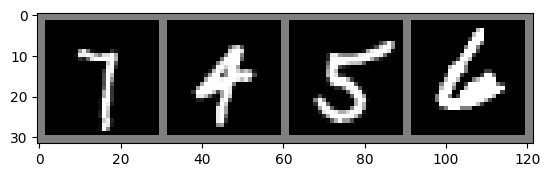

In [54]:
# 实际预测
data_loader_test = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size = 4,
                                          shuffle = True)
X_test, y_test = next(iter(data_loader_test))
X_test = X_test.to(device)
y_test = y_test.to(device)
inputs = Variable(X_test)
pred = CNN_model_wr(inputs)
_,pred = torch.max(pred, 1)

print("Predict Label is:", [ i for i in pred.data])
print("Mark Label is:",[i for i in y_test])

img = torchvision.utils.make_grid(X_test)
img = img.cpu()
img = img.numpy().transpose(1,2,0)

std  = [0.5,0.5,0.5]
mean = [0.5,0.5,0.5]
img = img*std+mean
plt.imshow(img)


In [61]:
# 保存模型参数
torch.save(CNN_model_wr, './model/my_model.pth')